In [41]:
from scipy.integrate import odeint
from scipy.integrate import quad, solve_ivp
from scipy import integrate
import numpy as np
import ZebraLib as zb
import pandas as pd
import matplotlib.pyplot as plt
import random
from tqdm import tqdm

In [6]:
def dSdx(x, S):
    x, v = S
    dxdt = v
    dvdt = -v**2 + np.sin(x)
    return dxdt, dvdt

x_0 = 0
v_0 = 5

S_0 = np.array([x_0, v_0])

t = np.linspace(0, 1, 100)
sol = solve_ivp(dSdx, t_span=(min(t), max(t)), y0=S_0, t_eval=t)

In [119]:
Zb = zb.Airplane(Load=25)

rho=1.225
Ground_Effect=False

def EDO(t, S):
    
    x, v = S

    dxdt = v

    T = Zb.trac_Available(v, rho)
    D = Zb.drag_Force(v, Zb.CLLO, rho, Ground_Effect)  # Testar CLmax e CLn or CLLO
    R = Zb.mi * (Zb.W - Zb.lift_Force(v, Zb.CLLO, rho))
    dvdt = (T - D - R) / (Zb.M)

    return [dxdt, dvdt]
    
x_0 = 0
v_0 = 0

S_0 = np.array([x_0, v_0])

t = np.linspace(0, 50, 1000)
sol = solve_ivp(EDO, t_span=(min(t), max(t)), y0=S_0, t_eval=t)

C:\Users\arthu\AppData\Local\Temp/ipykernel_21208/3963329463.py:1: RankWarning: Polyfit may be poorly conditioned
  p = zb.fit(sol.y[0], sol.y[1], 50)


(-5.0, 65.0)

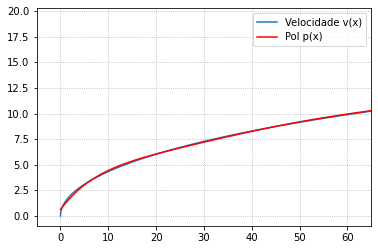

In [113]:

p = zb.fit(sol.y[0], sol.y[1], 50)

#plt.plot(sol.t, sol.y[0], label='Distância x(t)')
#plt.plot(sol.t, sol.y[1], label='Velocidade v(t)')

plt.plot(sol.y[0], sol.y[1], label='Velocidade v(x)')
plt.plot(sol.y[0], p(sol.y[0]), c='red',label='Pol p(x)')

plt.legend()
plt.grid(ls='dotted')
plt.xlim(-5, 65)

In [114]:
Vlo_index = zb.get_index_of_nearest_element(
    sol.y[1], Zb.veloc_Req(Zb.CLmax, rho) * 1.2
)

sol.y[0][Vlo_index] + Zb.hdist_Obstacle()

718.8962570287398

In [115]:
Zb.takeOff_Distance_EDO() + Zb.hdist_Obstacle()


155.08044195058778

In [108]:
Zb.takeOff_Distance_Anderson(), Zb.takeOff_Distance_AproxAnderson(), Zb.takeOff_Distance_AproxMiranda()


C:\Users\arthu\anaconda3\ZebraLib\zebralib\zebraperformance.py:2173: RuntimeWarning: invalid value encountered in log
  log = np.log(1 + C)


(nan, -833.9664555829512, -8770.251621946156)

In [ ]:
Zb = zb.Airplane(Load=5.5)

rho=1.225
Ground_Effect=False
pol_grau=6

#PRECISA INVERTER OLD V, T --> NEW T, V
def ED0_takeOff(t, v): 

    dxdt = v
    T = Zb.trac_Available(v, rho)
    D = Zb.drag_Force(v, Zb.CLLO, rho, Ground_Effect)  # Testar CLmax e CLn or CLLO
    R = Zb.mi * (Zb.W - Zb.lift_Force(v, Zb.CLLO, rho))
    dvdt = (T - D - R) / (Zb.M)

    return [dvdt, dxdt]

tempo_limite = 20
tempo = np.linspace(1e-1, tempo_limite, 20)

# Solução EDO V(t) e aproximando para polinômio
#V = odeint(ED0_takeOff, 0., tempo)

t_span = np.array([0., 20.])
Y0 = np.array([0.])

V = solve_ivp(ED0_takeOff, t_span, Y0, t_eval=tempo)
pol = zb.fit(tempo, V.y[0], pol_grau)  # Polinomio de grau 6

V.message